- audience score & number of audience ratings

In [74]:
import pandas as pd
df = pd.read_csv('bestofrt.tsv', sep='\t')
df.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


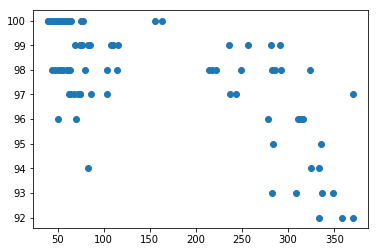

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.number_of_critic_ratings, df.critic_score)

### 1.  Web Scraping( HTML)
- The two main ways to work with HTML files are:

Saving the HTML file to your computer (using the Requests library for example) library and reading that file into a BeautifulSoup constructor<br>
Reading the HTML response content directly into a BeautifulSoup constructor-HTML parser (again using the Requests library for example)

In [11]:
import requests
url = "https://www.rottentomatoes.com/m/et_the_extraterrestrial"
response = requests.get(url)

# Frist wqy, Save HTML to file
with open("et_the_extraterrestria.html", mode='wb') as file:
    file.write(response.content)

In [12]:
# Second way, being done by not saving a file to the computer at all
# Work with HTML in memory
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content)

### 2. Extract the title from HTML file

In [23]:
from bs4 import BeautifulSoup


In [37]:
with open('rt_html/et_the_extraterrestrial.html', encoding="utf-8") as file:
    soup = BeautifulSoup(file)   # if there is a warning in there, put  (file, 'lxml')
soup.find('title')


<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [30]:
soup.title

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [33]:
soup.title.contents[0]         

'E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes'

In [35]:
soup.title.contents[0][:-len('- Rotten Tomatoes')]           

'E.T. The Extra-Terrestrial\xa0(1982) '

- xa0 - unicode of non-breaking space, TSV파일은 non-breaking space를 고려하지 않으므로 신경쓸필요 없다. regular space로 인식함.

#### If I download all 100 files, need to put this code in a loop. 

In [73]:
import os

df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html), encoding='utf-8') as file:
        soup = BeautifulSoup(file)
        #title
        title = soup.find('title').contents[0][:-len('- Rotten Tomatoes')]
        
        # <div class="audience-score meter">" 코드로 되어 있을 때
        # [:-1]  %표시 없앨때
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]
        
        # the number of audience ratings
        # <div class="audience-info hidden-xs superPageFontColor">
        #          <span class="subtle superPageFontColor"> Average Ratings </span> 코드로 되어 있을때
        div_num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
        
        # div가 2개 있는데, 여기서 필요한 것은 user rating이므로(2번째)
        second_div_num_audience_ratings = div_num_audience_ratings.find_all('div')[1]
        # div contents는 여러개.
        div_content = div_num_audience_ratings.find_all('div')[1].contents
        # div contetns 중 마지막 index.
        num_audience_ratings = div_num_audience_ratings.find_all('div')[1].contents[2]
        int_type = num_audience_ratings.strip().replace(',','')
        
        print(title)
        print(audience_score)
        print(div_num_audience_ratings)
        print('------second div----------')
        print(second_div_num_audience_ratings)
        print('------div contents----------')
        print(div_content)
        print('------audience rating----------')
        print(num_audience_ratings)
        print(int_type)

        df_list.append({'title': title,
                       'audience_score' : audience_score,
                       'num_audience_ratings': num_audience_ratings,
                       'int type_ratings': int_type})
df = pd.DataFrame(df_list, columns=['title', 'audience_score', 'num_audience_ratings', 'int type_ratings'])
df

E.T. The Extra-Terrestrial (1982) 
72
<div class="audience-info hidden-xs superPageFontColor">
<div>
<span class="subtle superPageFontColor">Average Rating:</span>
            3.5/5
                </div>
<div>
<span class="subtle superPageFontColor">User Ratings:</span>
        32,313,030</div>
</div>
------second div----------
<div>
<span class="subtle superPageFontColor">User Ratings:</span>
        32,313,030</div>
------div contents----------
['\n', <span class="subtle superPageFontColor">User Ratings:</span>, '\n        32,313,030']
------audience rating----------

        32,313,030
32313030
Finding Nemo (2003) 
86
<div class="audience-info hidden-xs superPageFontColor">
<div>
<span class="subtle superPageFontColor">Average Rating:</span>
            3.8/5
                </div>
<div>
<span class="subtle superPageFontColor">User Ratings:</span>
        33,355,673</div>
</div>
------second div----------
<div>
<span class="subtle superPageFontColor">User Ratings:</span>
        33

,title,audience_score,num_audience_ratings,int type_ratings
0,E.T. The Extra-Terrestrial (1982),72,"32,313,030",32313030
1,Finding Nemo (2003),86,"33,355,673",33355673
2,The Godfather (1972),98,"730,433",730433


### 3. Downloading Files from the Internet - Requests: HTTP for Humans
